In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
import importlib
from cycler import cycler
from matplotlib.ticker import MultipleLocator
from pathlib import Path
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 3\\utils.py'>

In [117]:
# Load data
# ------------------------------------------------------------------
# 1 · load the background once
# ------------------------------------------------------------------
bkg = utils.load_scan("Data/unk_18_bg.txt")          # rows = Mass values

data_dict = {}

path = 'Data/unk_18.txt'
df = utils.load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Unknown 18'] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------
print(data_dict["Unknown 18"].head())

   Mass  Pressure (uncorrected)  Pressure (torr)
0   1.0            3.480000e-10     2.619000e-10
1   1.1            2.630000e-09     2.453000e-09
2   1.2            1.860000e-08     1.767500e-08
3   1.3            1.500000e-07     1.339000e-07
4   1.4            5.310000e-08     4.668000e-08


In [118]:
bkg = utils.load_scan("Data/unk_4_bg.txt")
path = 'Data/unk_4.txt'
df = utils.load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Unknown 4'] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------
print(data_dict["Unknown 4"].head())

   Mass  Pressure (uncorrected)  Pressure (torr)
0   1.0            6.650000e-09     6.628100e-09
1   1.1            9.950000e-09     9.789000e-09
2   1.2            2.230000e-08     2.137300e-08
3   1.3            7.810000e-08     6.790000e-08
4   1.4            3.270000e-08     2.842000e-08


In [119]:
for key, df in data_dict.items():
    df.drop(columns=['Pressure (uncorrected)'], inplace=True)
print(data_dict)

{'Unknown 18':        Mass  Pressure (torr)
0       1.0     2.619000e-10
1       1.1     2.453000e-09
2       1.2     1.767500e-08
3       1.3     1.339000e-07
4       1.4     4.668000e-08
5       1.5     1.666000e-08
6       1.6     8.060000e-09
7       1.7     3.710000e-09
8       1.8     1.400000e-09
9       1.9     1.000000e-10
10      2.0     4.000000e-09
11      2.1     1.420000e-08
12      2.2     1.400000e-08
13      2.3     1.550000e-08
14      2.4     3.160000e-09
15      2.5     0.000000e+00
16      2.6     0.000000e+00
17      2.7     0.000000e+00
18      2.8     0.000000e+00
19      2.9     0.000000e+00
20      3.0     0.000000e+00
21      3.1     0.000000e+00
22      3.2     0.000000e+00
23      3.3     0.000000e+00
24      3.4     0.000000e+00
25      3.5     0.000000e+00
26      3.6     0.000000e+00
27      3.7     0.000000e+00
28      3.8     0.000000e+00
29      3.9     0.000000e+00
30      4.0     0.000000e+00
31      4.1     0.000000e+00
32      4.2     0.000000e+00

In [120]:
max_value = 0
for key, data in data_dict.items():
    temp_max = data['Pressure (torr)'].max()
    if temp_max > max_value:
        max_value = temp_max

    intensity = data['Pressure (torr)'] / max_value * 100  # Normalize to percentage
    data_dict[key]['Intensity'] = intensity

In [121]:
# for key, data in data_dict.items():
#     intensity = data['Pressure (torr)'] / max_value * 100  # Normalize to percentage
#     data_dict[key]['Intensity'] = intensity

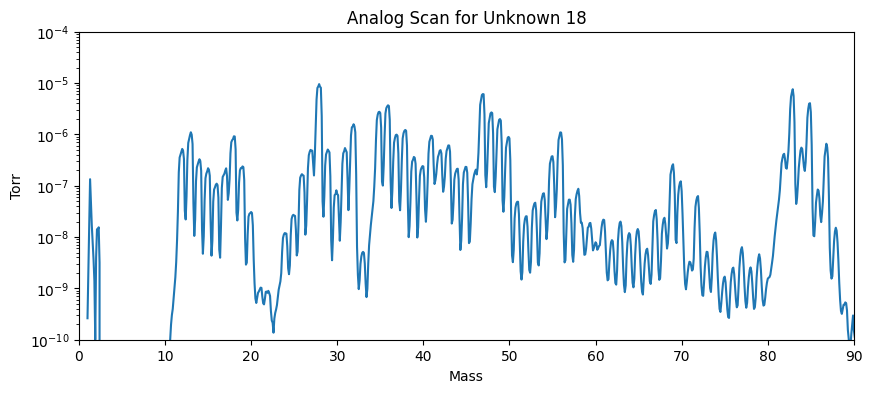

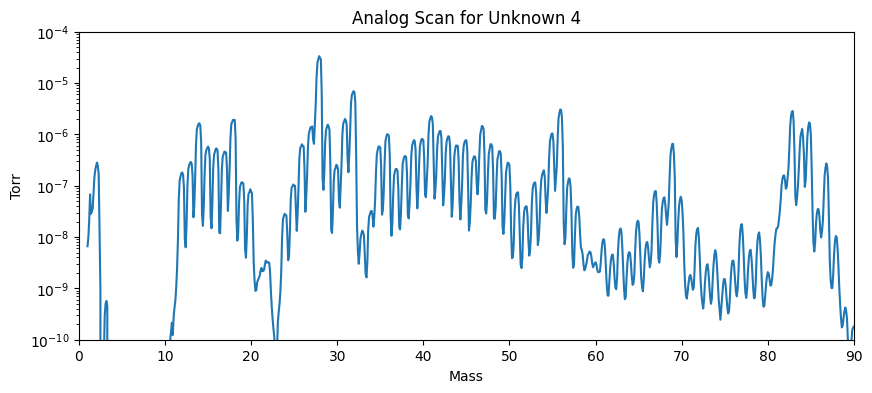

In [122]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
#     ax.axvline(x=2,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
#     ax.axvline(x=28,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
    ax.set_ylim(bottom=1e-10, top=1e-4)
    ax.set_xlim(0, 90)
    ax.set_yscale('log')
    ax.plot(data['Mass'], data['Pressure (torr)'])
    ax.set(xlabel='Mass', ylabel='Torr', title=f'Analog Scan for {key}')
    plt.show()
    

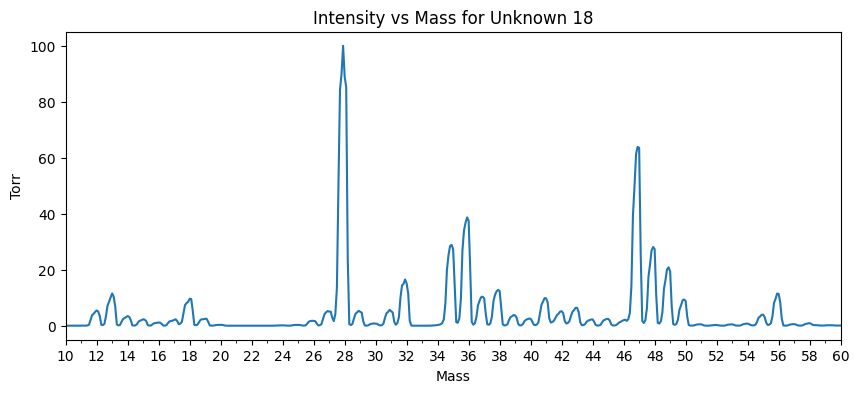

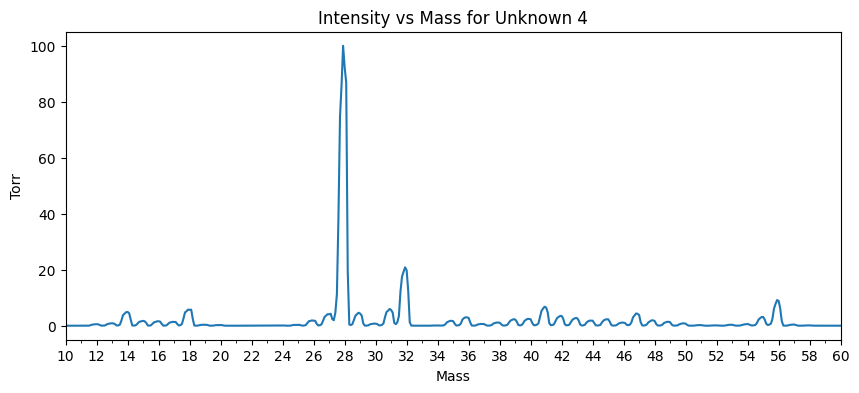

In [123]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(data['Mass'], data['Intensity'])
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    #    ax.axvline(x=2,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    #    ax.axvline(x=28,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    #    ax.axvline(x=42,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    ax.set_xlim(10, 60)
    ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for {key}')
    plt.show()
    

In [124]:
peaks_unk_4, peaks_mass_unk_4 = utils.find_peaks(data_dict['Unknown 4'], cutoff=5, interval=1.5)
peaks_unk_18, peaks_mass_unk_18 = utils.find_peaks(data_dict['Unknown 18'], cutoff=5, interval=1.5)

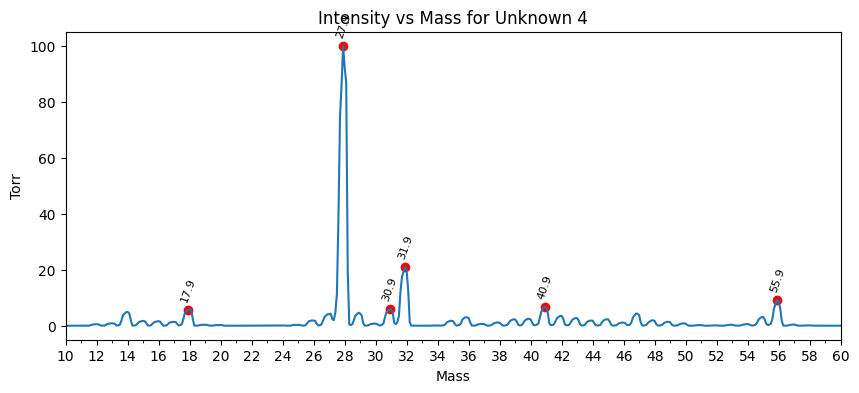

In [133]:

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data_dict['Unknown 4']['Mass'], data_dict['Unknown 4']['Intensity'])
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.scatter(peaks_mass_unk_4, peaks_unk_4, color='red')
for m, I in zip(peaks_mass_unk_4, peaks_unk_4):
    ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
                xy=(m, I),           # point to annotate
                xytext=(0, 5),       # (x-offset, y-offset) in points
                textcoords='offset points',
                ha='center',         # horizontal alignment
                va='bottom',         # vertical alignment
                fontsize=8,
                rotation=70)         # slanted like your sample
#    ax.axvline(x=2,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=28,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=42,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
ax.set_xlim(10, 60)
ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for {key}')
plt.show()

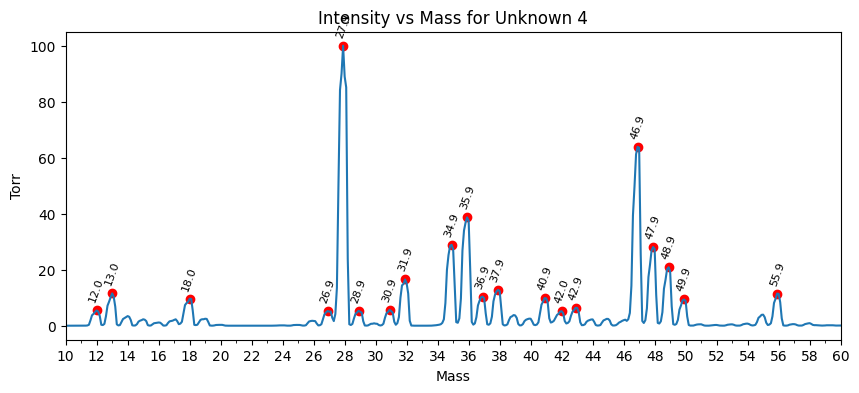

In [132]:

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data_dict['Unknown 18']['Mass'], data_dict['Unknown 18']['Intensity'])
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.scatter(peaks_mass_unk_18, peaks_unk_18, color='red')
for m, I in zip(peaks_mass_unk_18, peaks_unk_18):
    ax.annotate(f'{m:.1f}',          # label text, 1-decimal mass
                xy=(m, I),           # point to annotate
                xytext=(0, 5),       # (x-offset, y-offset) in points
                textcoords='offset points',
                ha='center',         # horizontal alignment
                va='bottom',         # vertical alignment
                fontsize=8,
                rotation=70)         # slanted like your sample
#    ax.axvline(x=2,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=28,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
#    ax.axvline(x=42,                   # x-coordinate where the line should appear
#        color='red',            # any Matplotlib colour
#        linestyle='--',         # '--', ':', '-.', or solid '-'
#        linewidth=1.5,
#        label='m/z 42')         # optional legend entry
ax.set_xlim(10, 60)
ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for {key}')
plt.show()

In [127]:
print(peaks_unk_18)

[np.float64(5.464023494860499), np.float64(11.530459408432977), np.float64(9.62869729389553), np.float64(5.231801971890078), np.float64(100.0), np.float64(5.317809943360604), np.float64(5.678309209146214), np.float64(16.519823788546255), np.float64(28.883784350744694), np.float64(38.683658485420594), np.float64(10.371722257184812), np.float64(12.788965806586953), np.float64(9.85525487728131), np.float64(5.174113698342773), np.float64(6.400356618418293), np.float64(63.86935179358086), np.float64(28.105422697713443), np.float64(20.868806377176423), np.float64(9.36851269142018), np.float64(11.48835745752045), np.float64(5.012471155863226), np.float64(79.5974407384099), np.float64(5.7895951332074675), np.float64(42.471313194881475), np.float64(6.901190476190476)]


In [128]:
print(peaks_mass_unk_18)

[np.float64(12.0), np.float64(13.0), np.float64(18.0), np.float64(26.9), np.float64(27.9), np.float64(28.9), np.float64(30.9), np.float64(31.9), np.float64(34.9), np.float64(35.9), np.float64(36.9), np.float64(37.9), np.float64(40.9), np.float64(42.0), np.float64(42.9), np.float64(46.9), np.float64(47.9), np.float64(48.9), np.float64(49.9), np.float64(55.9), np.float64(82.4), np.float64(82.9), np.float64(83.9), np.float64(84.9), np.float64(86.8)]


In [129]:
pd.set_option('display.max_rows', None)
print(data_dict['Unknown 18'])

       Mass  Pressure (torr)   Intensity
0       1.0     2.619000e-10    0.002747
1       1.1     2.453000e-09    0.025729
2       1.2     1.767500e-08    0.185389
3       1.3     1.339000e-07    1.404447
4       1.4     4.668000e-08    0.489616
5       1.5     1.666000e-08    0.174743
6       1.6     8.060000e-09    0.084540
7       1.7     3.710000e-09    0.038913
8       1.8     1.400000e-09    0.014684
9       1.9     1.000000e-10    0.001049
10      2.0     4.000000e-09    0.041955
11      2.1     1.420000e-08    0.148941
12      2.2     1.400000e-08    0.146843
13      2.3     1.550000e-08    0.162576
14      2.4     3.160000e-09    0.033145
15      2.5     0.000000e+00    0.000000
16      2.6     0.000000e+00    0.000000
17      2.7     0.000000e+00    0.000000
18      2.8     0.000000e+00    0.000000
19      2.9     0.000000e+00    0.000000
20      3.0     0.000000e+00    0.000000
21      3.1     0.000000e+00    0.000000
22      3.2     0.000000e+00    0.000000
23      3.3     

In [130]:
print(data_dict['Unknown 18'].max())

Mass               150.00000
Pressure (torr)      0.00001
Intensity          100.00000
dtype: float64
